<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221211_Consumer_Complaint_Classification_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2022/11/28/consumer-complaint-classification-with-machine-learning/

In [1]:
import pandas as pd
import numpy as np

from google.colab import files
from google.colab import drive
import io

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import string

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#upload = files.upload()

In [4]:
#data = pd.read_csv(io.BytesIO(upload['customercomplaints.csv']))
data = pd.read_csv('/content/drive/MyDrive/Ironhack/DBs/consumercomplaints.csv')
data.head()

,Unnamed: 0,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative
0,0,2022-11-11,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN
1,1,2022-11-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN
2,2,2022-11-16,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN
3,3,2022-11-15,Checking or savings account,Checking account,Managing an account,Fee problem,"Hi, I have been banking with Wells Fargo for o..."
4,4,2022-11-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN


In [5]:
data.isnull().sum()

Unnamed: 0                            0
Date received                         0
Product                               0
Sub-product                      235294
Issue                                 0
Sub-issue                        683355
Consumer complaint narrative    1987977
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.Product.value_counts()

Credit reporting, credit repair services, or other personal consumer reports    507582
Debt collection                                                                 192045
Credit card or prepaid card                                                      80410
Checking or savings account                                                      54192
Student loan                                                                     32697
Vehicle loan or lease                                                            19874
Payday loan, title loan, or personal loan                                         1008
Name: Product, dtype: int64

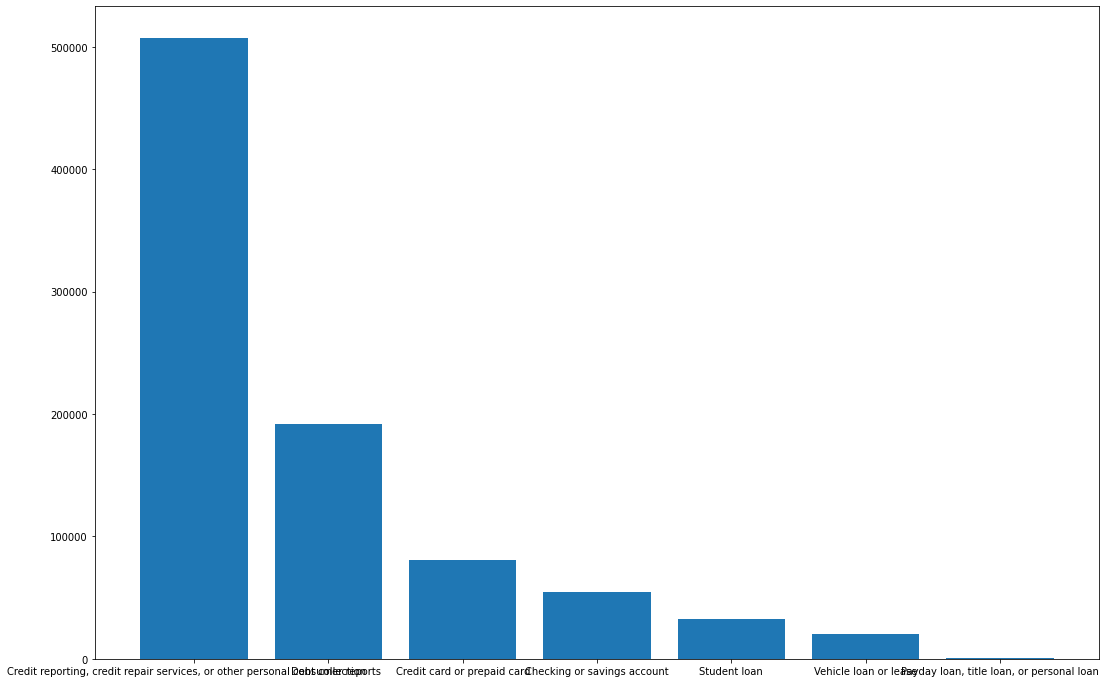

In [8]:
plt.figure(figsize=(18,12))
plt.bar(data.Product.value_counts().index, data.Product.value_counts().values)
plt.show()

In [9]:
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

In [10]:
def clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = ' '.join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = ' '.join(text)
    return text

In [11]:
data['clean text'] = data['Consumer complaint narrative'].apply(clean)

In [12]:
df = data[['clean text', 'Product']]
df.head()

,clean text,Product
3,hi bank well fargo decad within past year gra...,Checking or savings account
11,xxxx attempt collect fund valuat servic provid...,Debt collection
15,today call get balanc reset password credit ca...,"Credit reporting, credit repair services, or o..."
51,feder trade commiss bureau consum protect rece...,"Credit reporting, credit repair services, or o..."
72,ive mail polic report call hung stall rep lie ...,"Credit reporting, credit repair services, or o..."


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887808 entries, 3 to 3101964
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean text  887808 non-null  object
 1   Product     887808 non-null  object
dtypes: object(2)
memory usage: 20.3+ MB


In [21]:
x = np.array(df['clean text'])
y = np.array(df['Product'])

In [22]:
cv = CountVectorizer()
X = cv.fit_transform(x)

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((594831, 165954), (292977, 165954), (594831,), (292977,))

In [24]:
sgd = SGDClassifier()
sgd.fit(xtrain, ytrain)

SGDClassifier()

In [25]:
text1 = 'On XXXX/XXXX/2022, I called Citi XXXX XXXX XXXX XXXX XXXX Customer Service at XXXX. I did not want to pay {$99.00} for the next year membership and wanted to cancel my card account. A customer service representative told me if I pay the {$99.00} membership fee and spending {$1000.00} in 3 months, I can get XXXX mileage reward points of XXXX XXXX. I believed what he said and paid {$99.00} membership fee on XXXX/XXXX/2022.   I spent more than {$1000.00} in 3 months since XXXX/XXXX/2022. On XXXX/XXXX/2022, I called the card Customer Service about my reward mileage points. I was total the reward mileage points are NOT XXXX. I can only get XXXX mileage points instead. I believe that the Citi XXXX XXXX XXXX XXXX XXXX Customer Service cheated me. This is business fraud!'
text2 = 'Investigation took more than 30 days and nothing was changed when clearly there are misleading, incorrect, inaccurate items on my credit report..i have those two accounts attached showing those inaccuracies... I need them to follow the law because this is a violation of my rights!! The EVIDENCE IS IN BLACK AND WHITE ....'

In [26]:
user = text1
data = cv.transform([user]).toarray()
output = sgd.predict(data)
print(output)

['Credit card or prepaid card']


In [27]:
user = text2
data = cv.transform([user]).toarray()
output = sgd.predict(data)
print(output)

['Credit reporting, credit repair services, or other personal consumer reports']
